In [2]:
# INSTALL & IMPORT:
#!pip install pandas 
#!pip install scikit-learn
#!pip install seaborn
#!pip install matplotlib 
#!pip install numpy

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

In [17]:
data = pd.read_csv("/home/jovyan/Depression Student Dataset.csv")

# DATA VARIABLE ANALYSIS

##### Definitions of the variables and the nature of the dataframe.


In [18]:
data.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [19]:
print("Variable types in the data:")
print(data.dtypes)
print("\n")
print('The shape of the data:', data.shape)
print("\n")
print('Levels for Gender: \t \t', data["Gender"].unique())
print('Levels for Sleep Duration: \t', data["Sleep Duration"].unique())
print('Levels for Dietary Habits: \t', data["Dietary Habits"].unique())
print('Levels for Suicidal Thoughts: \t', data["Have you ever had suicidal thoughts ?"].unique())
print('Levels for Family History: \t', data["Family History of Mental Illness"].unique())

Variable types in the data:
Gender                                    object
Age                                        int64
Academic Pressure                        float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Study Hours                                int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object


The shape of the data: (502, 11)


Levels for Gender: 	 	 ['Male' 'Female']
Levels for Sleep Duration: 	 ['7-8 hours' '5-6 hours' 'More than 8 hours' 'Less than 5 hours']
Levels for Dietary Habits: 	 ['Moderate' 'Healthy' 'Unhealthy']
Levels for Suicidal Thoughts: 	 ['Yes' 'No']
Levels for Family History: 	 ['Yes' 'No']


##### The data we have consists of 11 variables both categorical and numerical with 502 rows, where one is the dependent variable and the rest of the vairables are explanatory. 
##### Categorical variables: Gender, Sleep Duration, Dietary Habits, Have you ever had suicidal thoughts ?, and Family History of Mental Illness.
##### Numerical variables: Age, Academic Pressure, Study Satisfaction, Study Hours, and Financial Stress.

# EXPLANATORY DATA ANALYSIS

##### Now we explore the relationships between the variables.

In [24]:
pd.set_option('mode.chained_assignment', None)
data['Depression'] = (data['Depression'] == 'Yes').astype(int)

data['Gender'] = np.where(data['Gender'] == 'Male', 1, 0)
data['Have you ever had suicidal thoughts ?'] = np.where(data['Have you ever had suicidal thoughts ?'] == 'Yes', 1, 0)
data['Family History of Mental Illness'] = np.where(data['Family History of Mental Illness'] == 'Yes', 1, 0)
ordinal_encoder_one = OrdinalEncoder(categories = [['Unhealthy','Moderate','Healthy']])
data['Dietary Habits'] = ordinal_encoder_one.fit_transform(data[['Dietary Habits']])
ordinal_encoder_two = OrdinalEncoder(categories =[['Less than 5 hours','5-6 hours','7-8 hours','More than 8 hours']])
data['Sleep Duration'] = ordinal_encoder_two.fit_transform(data[['Sleep Duration']])


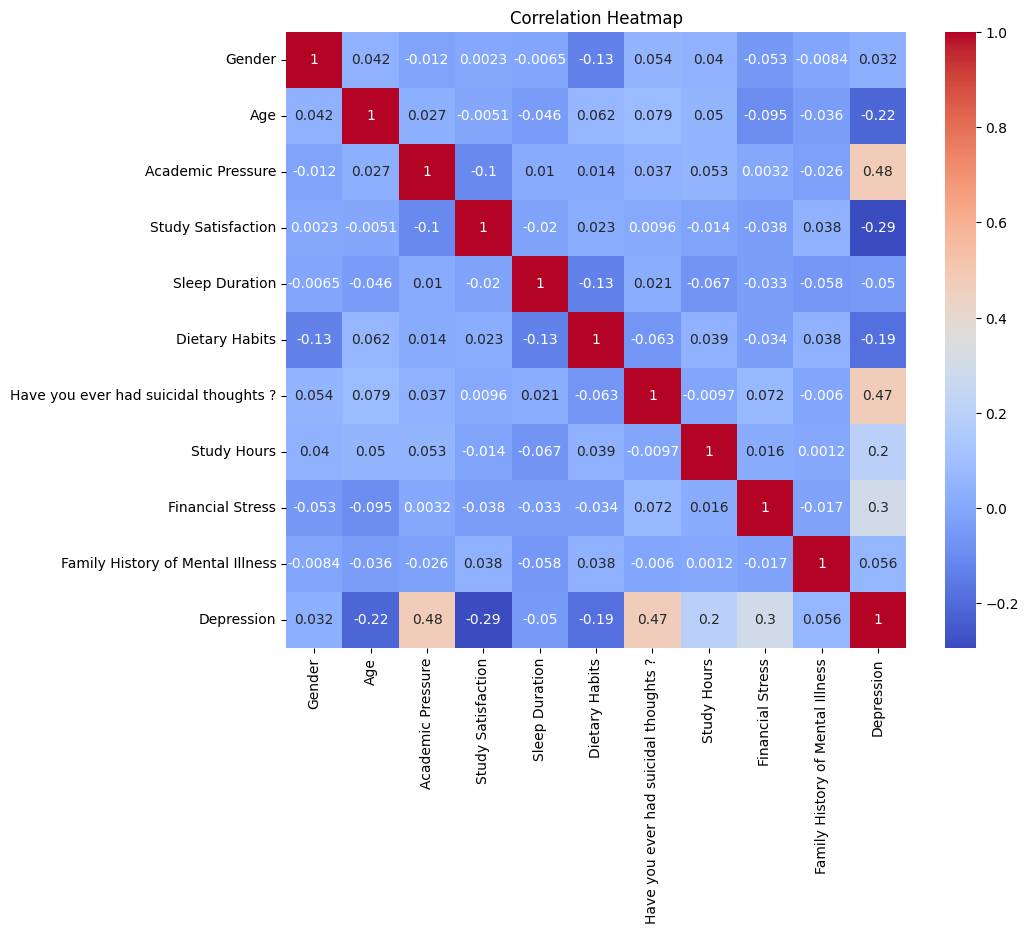

In [25]:
plt.figure(figsize=(10, 8))
# Compute the correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()


# DATA CLEANING

#### 1. Missing values:

In [6]:
data = pd.read_csv("/home/jovyan/Depression Student Dataset.csv") 
# Now we are done with EDA we reload the data start working with the data properly to avoid data leakage.
x = data[['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness',
          'Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']]
y = (data['Depression'] == 'Yes').astype(int)

In [7]:
miss_value_cols = [col for col in x.columns if x[col].isnull().any()] #Fetching the names of any columns with missing entries.
print(miss_value_cols)     # Printing the names.
missing_value_cols = x.isnull().sum()  # Finding the number of missing entries from each column.
missing_value_cols = missing_value_cols[missing_value_cols > 0]
print(missing_value_cols)   # Printing the names and the statistics.

[]
Series([], dtype: int64)


##### It appears there are no missing values present in the data.

#### 2. Categorical variables:

In [8]:
pd.set_option('mode.chained_assignment', None)
x['Gender'] = np.where(x['Gender'] == 'Male', 1, 0)
x['Have you ever had suicidal thoughts ?'] = np.where(x['Have you ever had suicidal thoughts ?'] == 'Yes', 1, 0)
x['Family History of Mental Illness'] = np.where(x['Family History of Mental Illness'] == 'Yes', 1, 0)

train_x, valid_x, train_y, valid_y = tts(x,y, train_size = 0.7, test_size = 0.3, random_state = 0)

ordinal_encoder_one = OrdinalEncoder(categories = [['Unhealthy','Moderate','Healthy']])
train_x['Dietary Habits'] = ordinal_encoder_one.fit_transform(train_x[['Dietary Habits']])
valid_x['Dietary Habits'] = ordinal_encoder_one.transform(valid_x[['Dietary Habits']])

ordinal_encoder_two = OrdinalEncoder(categories =[['Less than 5 hours','5-6 hours','7-8 hours','More than 8 hours']])
train_x['Sleep Duration'] = ordinal_encoder_two.fit_transform(train_x[['Sleep Duration']])
valid_x['Sleep Duration'] = ordinal_encoder_two.transform(valid_x[['Sleep Duration']])
